In [2]:
import pandas as pd

df_main=pd.read_csv('data.csv')

df1=df_main.copy()
df1.head(5)


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Female,42.0,0.0,0.0,Yes,Private,Rural,84.60,27.0,smokes,0
1,Male,77.0,0.0,0.0,Yes,Private,Urban,94.68,33.6,Unknown,0
2,Female,57.0,0.0,0.0,Yes,Govt_job,Urban,110.52,28.5,Unknown,1
3,Male,8.0,0.0,0.0,No,children,Urban,118.66,16.1,Unknown,0
4,Female,66.0,0.0,0.0,Yes,Self-employed,Urban,101.45,29.3,Unknown,1


In [3]:
print(df1.nunique())
print('------'*20)

print(df1.dtypes)
print('------'*20)

print(df1.isnull().sum())
print('------'*20)

print(df1.shape)

gender                  2
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               4
Residence_type          2
avg_glucose_level    3889
bmi                   342
smoking_status          4
stroke                  2
dtype: int64
------------------------------------------------------------------------------------------------------------------------
gender                object
age                  float64
hypertension         float64
heart_disease        float64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object
------------------------------------------------------------------------------------------------------------------------
gender                3
age                   1
hypertension          9
heart_disease        13
ever_married          4
work_t

In [4]:
print(df1.shape)

df1.dropna(inplace=True)

print(df1.shape)

(4981, 11)
(4906, 11)


In [5]:
print(df1.isnull().sum())

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64


In [6]:
print(df1.dtypes)

gender                object
age                  float64
hypertension         float64
heart_disease        float64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object


In [7]:
#encode

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df1['gender']=le.fit_transform(df1['gender'])
df1['ever_married']=le.fit_transform(df1['ever_married'])
df1['work_type']=le.fit_transform(df1['work_type'])
df1['Residence_type']=le.fit_transform(df1['Residence_type'])
df1['smoking_status']=le.fit_transform(df1['smoking_status'])

print(df1.dtypes)




gender                 int32
age                  float64
hypertension         float64
heart_disease        float64
ever_married           int32
work_type              int32
Residence_type         int32
avg_glucose_level    float64
bmi                  float64
smoking_status         int32
stroke                 int64
dtype: object


In [8]:
df1.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [9]:
df1.head(4)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,42.0,0.0,0.0,1,1,0,84.60,27.0,3,0
1,1,77.0,0.0,0.0,1,1,1,94.68,33.6,0,0
2,0,57.0,0.0,0.0,1,0,1,110.52,28.5,0,1
3,1,8.0,0.0,0.0,0,3,1,118.66,16.1,0,0


In [10]:
#scalling

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

df1[['age', 'avg_glucose_level', 'bmi']] = scaler.fit_transform(df1[['age', 'avg_glucose_level', 'bmi']])
df1.head(4)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,-0.062545,0.0,0.0,1,1,0,-0.474482,-0.218898,3,0
1,1,1.482195,0.0,0.0,1,1,1,-0.251349,0.752515,0,0
2,0,0.599487,0.0,0.0,1,0,1,0.099288,0.001878,0,1
3,1,-1.563148,0.0,0.0,0,3,1,0.279476,-1.823200,0,0


In [11]:
#removing stroke from feature 

x = df1.drop('stroke', axis=1)
y=df1['stroke']

print(x.shape)
print(y.shape)

(4906, 10)
(4906,)


In [12]:
#test_size=0.2           #how many we want to test
#random_state=42         #ensures that after split, whatever is in the test remains there and same for train,......thus ensuring consistency
                        #controls shuffling
import random


test_size=(random.randint(1,50))/100

random_state=(random.randint(1,50))

In [13]:
#KNN

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=test_size, random_state=random_state)

print(x_train.shape)
print(y_train.shape)

print(x_test.shape)
print(y_test.shape)

(3139, 10)
(3139,)
(1767, 10)
(1767,)


In [14]:
#model building

from sklearn.neighbors import KNeighborsClassifier

knn= KNeighborsClassifier()

knn.fit(x_train, y_train)
knn_pred=knn.predict(x_test)


In [15]:
from sklearn.metrics import confusion_matrix

cm_knn= confusion_matrix(y_test, knn_pred)
print(cm_knn)

[[1668   12]
 [  85    2]]


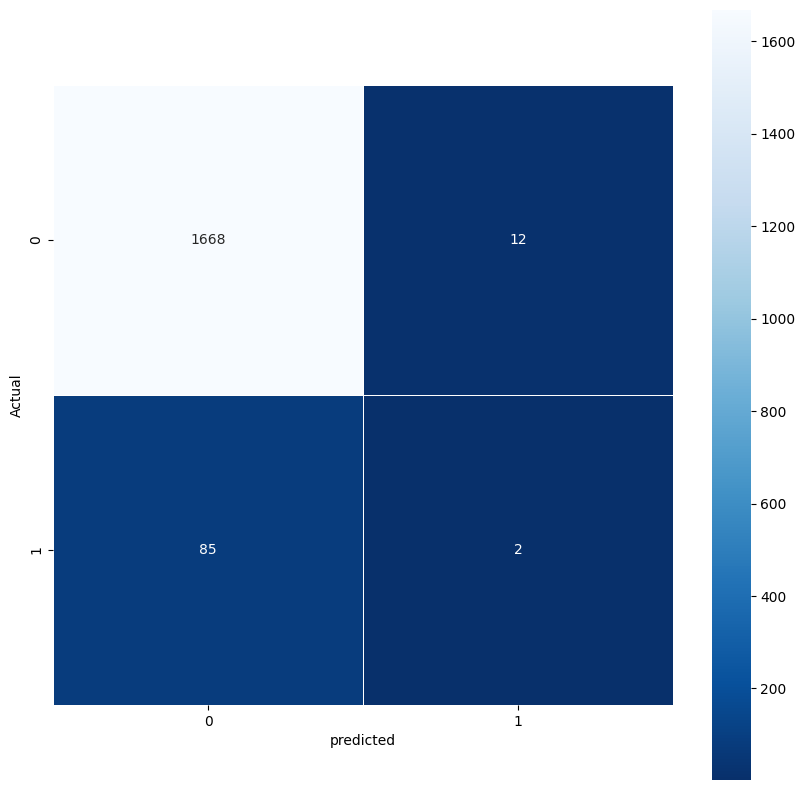

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,10))
sns.heatmap(cm_knn, annot=True, fmt="d",linewidths=0.5, square=True, cmap='Blues_r')
plt.ylabel("Actual")
plt.xlabel("predicted")
plt.show()

In [19]:
from sklearn.metrics import classification_report
print(classification_report(y_test, knn_pred))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1680
           1       0.14      0.02      0.04        87

    accuracy                           0.95      1767
   macro avg       0.55      0.51      0.51      1767
weighted avg       0.91      0.95      0.93      1767



In [20]:
print((832+1)/(832+1+50+1))

0.9423076923076923


In [22]:
#ANN

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense 

"""
2 hidden 10
1 out 1
1 in 10

"""

model = Sequential()
model.add(Dense(10,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(2,activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history= model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))


Epoch 1/10
99/99 [==============================] - 1s 6ms/step - loss: 0.5379 - accuracy: 0.6875 - val_loss: 0.2083 - val_accuracy: 0.9508
Epoch 2/10
99/99 [==============================] - 0s 4ms/step - loss: 0.1963 - accuracy: 0.9487 - val_loss: 0.1824 - val_accuracy: 0.9508
Epoch 3/10
99/99 [==============================] - 0s 3ms/step - loss: 0.1830 - accuracy: 0.9487 - val_loss: 0.1737 - val_accuracy: 0.9508
Epoch 4/10
99/99 [==============================] - 0s 3ms/step - loss: 0.1752 - accuracy: 0.9487 - val_loss: 0.1686 - val_accuracy: 0.9508
Epoch 5/10
99/99 [==============================] - 0s 3ms/step - loss: 0.1710 - accuracy: 0.9487 - val_loss: 0.1660 - val_accuracy: 0.9508
Epoch 6/10
99/99 [==============================] - 0s 3ms/step - loss: 0.1677 - accuracy: 0.9487 - val_loss: 0.1655 - val_accuracy: 0.9508
Epoch 7/10
99/99 [==============================] - 0s 4ms/step - loss: 0.1656 - accuracy: 0.9487 - val_loss: 0.1628 - val_accuracy: 0.9508
Epoch 8/10
99/99 [==

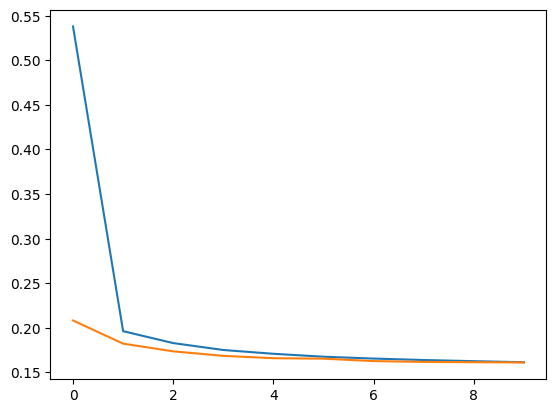

In [23]:
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['val_loss'],label='val_loss')